## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [2]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.set_option('display.max_columns', None)

## Prepare the data set

In [3]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


In [4]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [5]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [6]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [7]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [8]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [9]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [10]:
target = 'survived'

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   cabin     295 non-null    object 
 8   embarked  1307 non-null   object 
 9   title     1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [12]:
numerical_types = [int, float]

vars_num = [col for col in data.columns if data[col].dtype in numerical_types and col != target]

vars_cat = [col for col in data.columns if data[col].dtype == "object"]

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


### Find missing values in variables

In [13]:
for num_var in vars_num:
    print(f"{num_var:12}{data[num_var].isna().sum():5} missing values")

pclass          0 missing values
age           263 missing values
sibsp           0 missing values
parch           0 missing values
fare            1 missing values


In [14]:
# now in categorical variables
for cat_var in vars_cat:
    print(f"{cat_var:12}{data[cat_var].isna().sum():5} missing values")

sex             0 missing values
cabin        1014 missing values
embarked        2 missing values
title           0 missing values


### Determine cardinality of categorical variables

In [14]:
for cat_var in vars_cat:
    print(f"{cat_var:12}{data[cat_var].nunique():5} unique values")

sex             2 unique values
cabin         181 unique values
embarked        3 unique values
title           5 unique values


### Determine the distribution of numerical variables

Minimum value for pclass is 1
Maximum value for pclass is 3


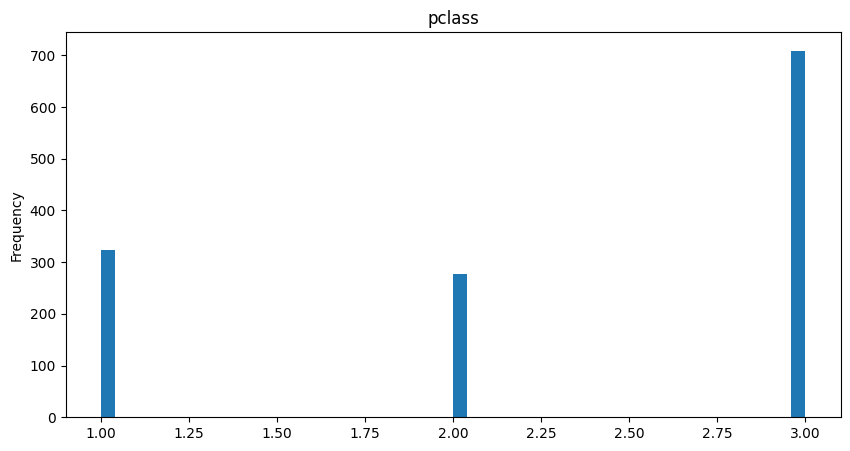

Minimum value for age is 0.1667
Maximum value for age is 80.0


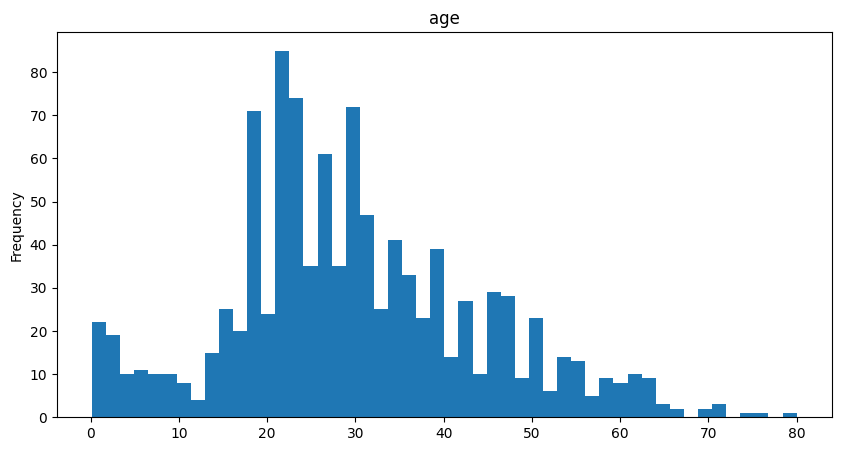

Minimum value for sibsp is 0
Maximum value for sibsp is 8


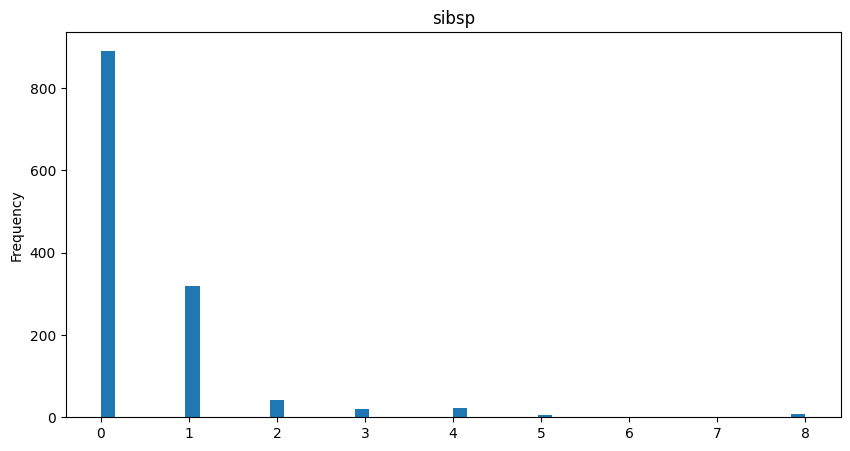

Minimum value for parch is 0
Maximum value for parch is 9


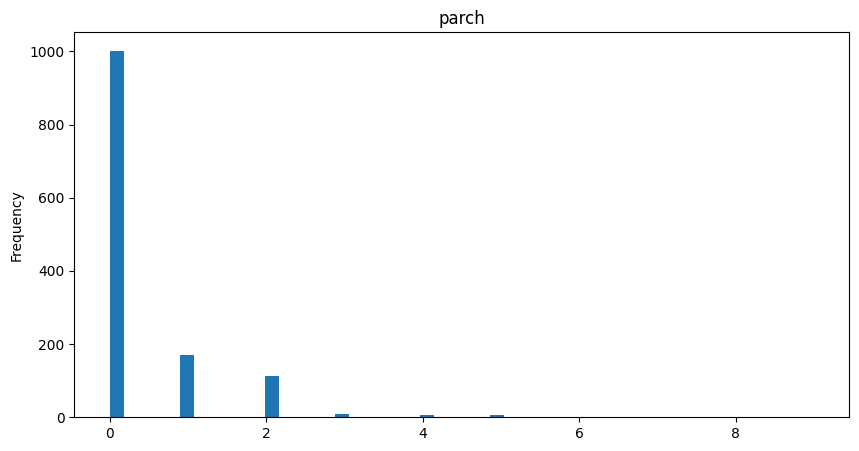

Minimum value for fare is 0.0
Maximum value for fare is 512.3292


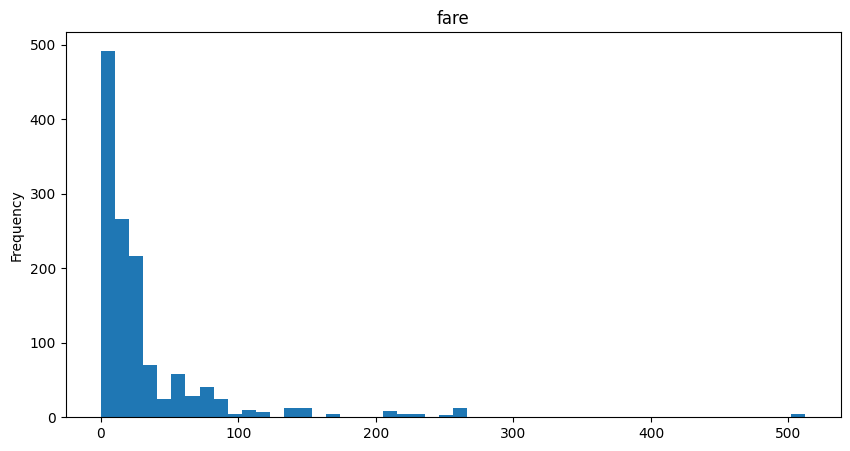

In [15]:
for num_var in vars_num:
    print(f"Minimum value for {num_var} is {data[num_var].min()}")
    print(f"Maximum value for {num_var} is {data[num_var].max()}")
    data[num_var].plot(kind='hist', bins=50, figsize=(10,5))
    plt.title(num_var)
    plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [16]:
for label, X in zip(["train", "test"], [X_train, X_test]):
    X["cabin"] = X["cabin"].str[0]
    print(label, "=", X["cabin"].unique())

train = [nan 'E' 'F' 'A' 'C' 'D' 'B' 'T' 'G']
test = [nan 'G' 'E' 'C' 'B' 'A' 'F' 'D']


### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [17]:
for label, X in zip(["train", "test"], [X_train, X_test]):
    for numeric_with_na in ["age", "fare"]:
        X[numeric_with_na + "_NA"] = np.where(X[numeric_with_na].isnull(), 1, 0)
        X[numeric_with_na] = X[numeric_with_na].fillna(X[numeric_with_na].median())

X_train[['age', 'fare']].isnull().sum()

age     0
fare    0
dtype: int64

### Replace Missing data in categorical variables with the string **Missing**

In [18]:
for X in [X_train, X_test]:
        X[vars_cat] = X[vars_cat].fillna("Missing")

In [19]:
X_train[vars_cat].isnull().sum()

sex         0
cabin       0
embarked    0
title       0
dtype: int64

In [20]:
X_test[vars_cat].isnull().sum()

sex         0
cabin       0
embarked    0
title       0
dtype: int64

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [21]:
def is_rare_cat(df, var, tolerance = 0.05):
    df = df.copy()
    criterion = df[var].value_counts() / len(df) <= tolerance
    return df[var].isin(criterion[criterion].index)

In [22]:
for var in vars_cat:
    X_train[var] = np.where(is_rare_cat(X_train, var, tolerance = 0.05), "Rare", X_train[var])
    X_test[var] = np.where(is_rare_cat(X_test, var, tolerance = 0.05), "Rare", X_test[var])

In [25]:
for var in vars_cat:
    print(X_train[var].value_counts(normalize=True))

sex
male      0.633238
female    0.366762
Name: proportion, dtype: float64
cabin
Missing    0.766953
Rare       0.158548
C          0.074499
Name: proportion, dtype: float64
embarked
S       0.709647
C       0.195798
Q       0.092646
Rare    0.001910
Name: proportion, dtype: float64
title
Mr      0.569245
Miss    0.200573
Mrs     0.159503
Rare    0.070678
Name: proportion, dtype: float64


### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [26]:
X_train = pd.concat([X_train, pd.get_dummies(X_train[vars_cat], drop_first=True)], axis=1).drop(vars_cat, axis=1)
X_test = pd.concat([X_test, pd.get_dummies(X_test[vars_cat], drop_first=True)], axis=1).drop(vars_cat, axis=1)

X_train.shape, X_test.shape

((1047, 16), (262, 16))

In [27]:
X_train.head()

,pclass,age,sibsp,parch,fare,age_NA,fare_NA,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1118,3,25.0,0,0,7.9250,0,0,True,True,False,False,False,True,True,False,False
44,1,41.0,0,0,134.5000,0,0,False,False,True,False,False,False,False,False,False
1072,3,28.0,0,0,7.7333,1,0,True,True,False,True,False,False,True,False,False
1130,3,18.0,0,0,7.7750,0,0,False,True,False,False,False,True,False,False,False
574,2,29.0,1,0,21.0000,0,0,True,True,False,False,False,True,True,False,False


In [28]:
X_test.head()

,pclass,age,sibsp,parch,fare,age_NA,fare_NA,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Rare
1139,3,38.0,0,0,7.8958,0,0,True,True,False,False,True,False,True,False,False
533,2,21.0,0,1,21.0000,0,0,False,True,False,False,True,True,False,False,False
459,2,42.0,1,0,27.0000,0,0,True,True,False,False,True,False,True,False,False
1150,3,26.0,0,0,14.5000,1,0,True,True,False,False,True,False,True,False,False
393,2,25.0,0,0,31.5000,0,0,True,True,False,False,True,False,True,False,False


In [29]:
print("Not in test, but in train:", [col for col in X_train.columns if col not in X_test.columns])

Not in test, but in train: ['embarked_Rare']


In [30]:
X_test["embarked_Rare"] = False

In [31]:
print("Not in train, but in test:", [col for col in X_test.columns if col not in X_train.columns])

Not in train, but in test: ['title_Miss']


In [32]:
X_train["title_Miss"] = False

In [33]:
variables = [c  for c in X_train.columns]
variables

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'age_NA',
 'fare_NA',
 'sex_male',
 'cabin_Missing',
 'cabin_Rare',
 'embarked_Q',
 'embarked_Rare',
 'embarked_S',
 'title_Mr',
 'title_Mrs',
 'title_Rare',
 'title_Miss']

### Scale the variables

- Use the standard scaler from Scikit-learn

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#  fit  the scaler to the train set
scaler.fit(X_train[variables]) 

# transform the train and test set
X_train = scaler.transform(X_train[variables])

X_test = scaler.transform(X_test[variables])

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [35]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=0, C=0.0005)

logistic_regression.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [36]:
train_pred_proba = logistic_regression.predict_proba(X_train)
test_pred_proba = logistic_regression.predict_proba(X_test)

print(f"Train ROC AUC: {roc_auc_score(y_train, train_pred_proba[:,1]):.3f}")
print(f"Test ROC AUC: {roc_auc_score(y_test, test_pred_proba[:,1]):.3f}")
print()

train_pred = logistic_regression.predict(X_train)
test_pred = logistic_regression.predict(X_test)

print(f"Train accuracy: {accuracy_score(y_train, train_pred):.3f}")
print(f"Test accuracy: {accuracy_score(y_test, test_pred):.3f}")
print()


Train ROC AUC: 0.843
Test ROC AUC: 0.836

Train accuracy: 0.713
Test accuracy: 0.702



That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**